# Trabajando con imágenes y video en python

In [1]:
#Importamos las librerías necesarias
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen

Para leer una imagen en Python podemos usar diferentes librerías. Las más comunes son **<font color='green'>OpenCV</font>** y **<font color='magenta'>Pillow</font>**.:

## Leer una imagen en un directorio local

Primero necesitamos una imagen para leer.
En el panel "Archivos", a tu izquerda, da click derecho > "Subir" y carga alguna imagen que tengas en tu PC.

### Leer una imagen con OpenCV

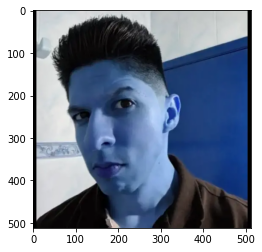

In [2]:
# Agrega una imagen a Archivos y cambia "MiImagen" por el nombre
# y "ext" por la extensión (jpg, png, etc)

img_bgr = cv2.imread("MiImagen.ext")
plt.imshow(img_bgr)
plt.show()

Sin embargo, **cv2.imread** nos entrega una imagen con los canales invertidos, con el orden azul, verde, rojo; es decir, BGR.

Para organizarlos en el orden RGB podemos usar el siguiente comando:

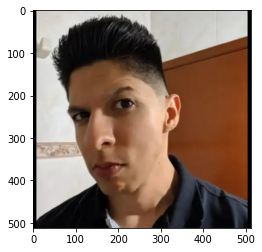

In [3]:
# Convertimos la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

### Leer una imagen con Pillow

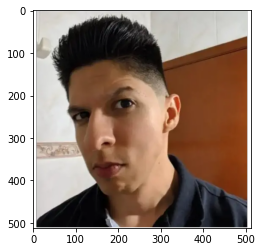

In [4]:
# Agrega una imagen a Archivos y cambia "MiImagen" por el nombre
# y "ext" por la extensión

img_pil = Image.open("MiImagen.ext")
img_rgb = np.array(img_pil)
plt.imshow(img_rgb)
plt.show()

A diferencia de **cv2.imread** (de OpenCV), **Image.open** (de Pillow) sí nos entrega la imagen con los canales en el orden RGB.

<br>

## Leer una imagen usando su url

También podemos leer imágenes que no se encuentren en la web, sin la necesidad de descargarlas. Usando la función **urlopen** de la librería **urllib.request** podemos leer una imágen a través de su url.

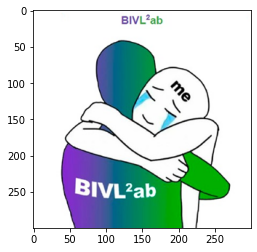

In [5]:
# Leer una imagen de una ubicación remota, mediante su url

img_url = Image.open(urlopen("https://gitlab.com/gustavogarzonv/pics/-/raw/main/grupo.png"))
img_url = np.array(img_url)
plt.imshow(img_url)
plt.show()

<br><br>

## Dimensiones de una imagen

Antes de continuar, descargaremos una carpeta con algunas imágenes que nos serán útiles. Para esto debemos correr las siguientes dos celdas.



In [ ]:
# Instalamos git para Python
!pip3 install gitpython

In [ ]:
# Descargamos una carpeta con datos de un repositorio
# (Ignora el mensaje "rm: cannot remove 'data' ...")

from git.repo.base import Repo
!rm -r data

url = 'https://gitlab.com/luis.guayacan1/semillero_macv_2022-1.git'
Repo.clone_from(url,"data");

Revisa en el panel "Archivos" de la izquierda; debe aparecer una nueva carpeta llamada "data". Si ya corriste las dos celdas anteriores y no ves la carpeta... espera unos segundos.

<br>

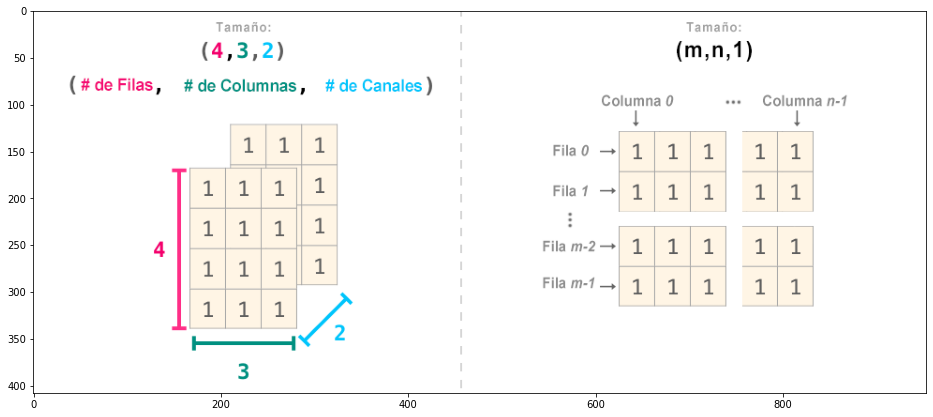

In [8]:
# Para mostrar grande la imagen
plt.figure(figsize=(16,8))

# Imagen sobre dimensiones
img_Dimensiones = Image.open("data/Dimensiones.png")
img_Dimensiones = np.array(img_Dimensiones)
plt.imshow(img_Dimensiones)
plt.show()

La imagen anterior nos permite ver:
- el orden de las dimensiones de una imagen (Filas, Columnas, Canales).

- que las filas se cuentan de arriba a abajo; y las columnas, de izquierda a derecha.

Ahora imprimamos las dimensiones de la imagen anterior

In [9]:
# Imprimimos el tamaño de la imagen
print("El tamaño de la imagen (Filas, columnas, canales) es: ", img_Dimensiones.shape)

El tamaño de la imagen (Filas, columnas, canales) es:  (408, 953, 3)


## Canales de color RGB

Ahora visualicemos cada uno de los canales RGB de manera independiente

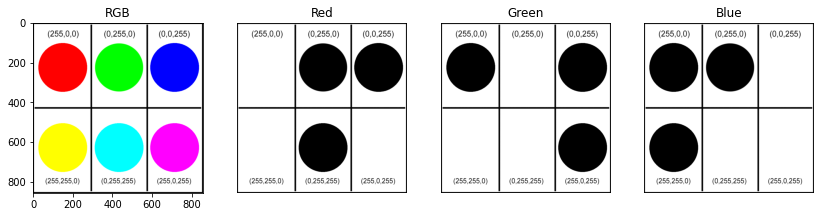

In [10]:
# Leemos una imagen
img = Image.open("data/RGB.png")
img = np.array(img)

# Guardamos cada canal en una variable diferente
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]


# Dibujamos la imagen original y cada uno de los canales
plt.figure(figsize=(14,4))

plt.subplot(1,4,1)
plt.imshow(img)
plt.title("RGB")

plt.subplot(1,4,2)
plt.imshow(img_R, cmap='gray')
plt.title("Red")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_G, cmap='gray')
plt.title("Green")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_B, cmap='gray', )
plt.title("Blue") 
plt.axis('off')

plt.show()

**Analiza la imagen anterior y asegurate de tener claro por qué hacen falta círculos negros en algunas casillas de las imagenes Red, Green y Blue.**


Pero... ¿Por qué el canal rojo no se ve de color rojo? ¿y por qué no ocurre lo propio con los otros dos canales?

Bien, esto se debe a que cada uno de ellos corresponde únicamente a una matriz, es decir, no cuenta con la información de los otros canales para poder generar algún color.

Si no te quedó claro no te preocupes, con la siguiente celda podrás contrastar la diferencia y resolver tú mismo estas preguntas.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


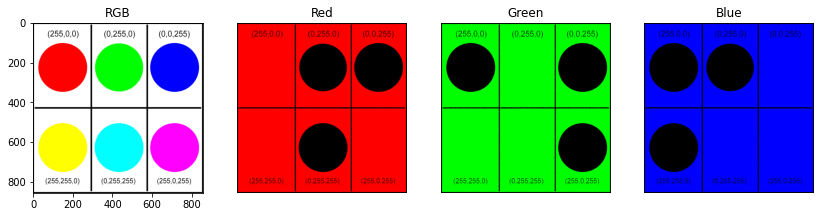

In [11]:
# Leemos una imagen
img = Image.open("data/RGB.png")
img = np.array(img)

# Guardamos cada canal en una variable diferente
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]


# *****************-Esto es lo diferente-***********************
# CREAMOS UN CANAL AUXILIAR PARA COMPLETAR 3 CANALES en cada caso
matrizDeCeros = np.zeros(img_B.shape)

# Guardamos cada canal (AHORA EN RGB) en una variable diferente
Rojo  = np.array([img_R, matrizDeCeros, matrizDeCeros])
Verde = np.array([matrizDeCeros, img_G, matrizDeCeros])
Azul  = np.array([matrizDeCeros, matrizDeCeros, img_B])
# ***************************************************************

# Esto es necesario pero no es relevante entenderlo ahora
Rojo  = np.transpose(Rojo, (1, 2, 0,))
Verde = np.transpose(Verde, (1, 2, 0,))
Azul  = np.transpose(Azul, (1, 2, 0,))

# Dibujamos la imagen original y cada uno de los canales
plt.figure(figsize=(14,4))

plt.subplot(1,4,1)
plt.imshow(img)
plt.title("RGB")

plt.subplot(1,4,2)
plt.imshow(Rojo, cmap='gray');
plt.title("Red")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(Verde, cmap='gray')
plt.title("Green")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(Azul, cmap='gray')
plt.title("Blue") 
plt.axis('off')

plt.show()

## Escala de grises

La primera vez que dibujamos los canales por separado notamos que cada imagen estaba en escala de grises. Sin embargo, ninguna de las tres podría ser considerada como la versión "a blanco y negro" de la imagen original, porque de manera individual carecen de toda la información necesaria.

***Para convertir una imagen a escala de grises debemos tener en cuenta la información proporcionada por todos los canales.***

En Python existen varias formas de convertir una imagen a escala de grises, puede ser calculando el promedio ponderado de los canales o usando una función predefinida de alguna librería (más fácil).

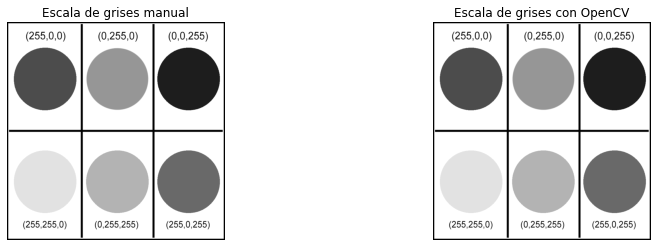

In [12]:

# 1. Conversión manual de RGB a escala de grises
img_gray1 = 0.2989*img_R + 0.5870*img_G + 0.1140*img_B 

# 2. Conversión usando OpenCV
img_gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

 
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.imshow(img_gray1, cmap='gray')
plt.title("Escala de grises manual")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_gray2, cmap='gray')
plt.title("Escala de grises con OpenCV") 
plt.axis('off')

plt.show()

## Imagen binaria

Considera la siguiente imagen

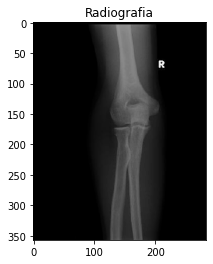

In [13]:
# Se carga una nueva imagen 
img = Image.open("data/radiografia.png")

# Esta es otra forma de convertir RGB a gris:
imgGray = img.convert('L')       
plt.imshow(imgGray, cmap='gray')
plt.title("Radiografia");

Supongamos que queremos visualizar en blanco (255) los huesos y que el resto de la imagen sea negra (0). Primero necesitaríamos tener una idea aproximada de qué valores de intensidad tienen los pixeles de los huesos para poder diferenciarlo de los pixeles correspondientes a los otros tejidos del cuerpo.

**Para esto contamos con una herramienta llamada *histograma* la cual nos permite visualizar cuántos pixeles de cada valor (0-255) hay en la imagen.**

Con esto podremos detectar los valores de los principales cambios de intensidad en la imagen y así, definir un **umbral** adecuado para **binarizar** la imagen correctamente.

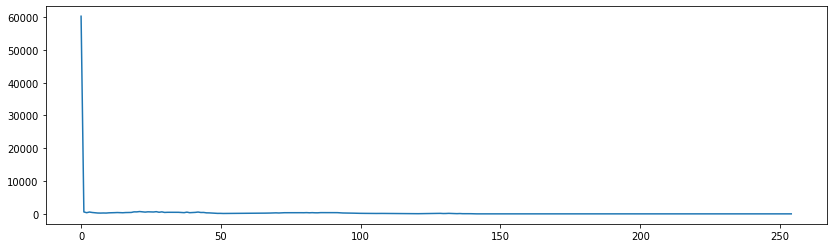

In [14]:
# Visualizamos el HISTOGRAMA
# La cantidad de pixeles de cada valor en la imagen

plt.figure(figsize=(14,4))
histogram, bin_edges = np.histogram(imgGray, bins=256, range=(0, 255))
plt.plot(bin_edges[0:-1], histogram) 
plt.show()

¡Pero qué ha pasao!

El histograma no nos está brindando mucha información en este momento. Analiza el histograma, observa los valores del eje de las ordenadas (vertical) y asegurate de entenderlo antes de continuar.

...<br>

¿Listo?

**Explicación:** La imagen contiene MUCHOS pixeles con el valor 0, muchos más que cualquier otro valor, por lo cual la diferencia de magnitud opaca e invisibiliza la altura de los demás bines (barras) del histograma.

Esto lo podemos solucionar si ignoramos el primer bin, correspondiente al valor 0. Para esto ajustamos los valores del parámetro *range* de la función threshold.

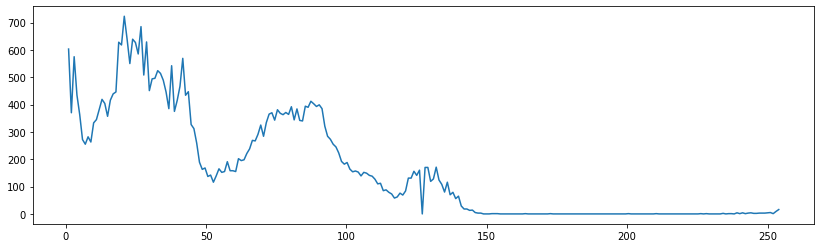

In [15]:
# Ignoramos la barra (bin) correspondiente al 0
# range(0, 255)  ->  range(1, 255)

plt.figure(figsize=(14,4))
histogram, bin_edges = np.histogram(imgGray, bins=256, range=(1, 255))
plt.plot(bin_edges[0:-1], histogram) 
plt.show()

¡Ahora sí!

Podemos identificar varios valores donde se producen cambios de intensidad importantes:


*   Aprox. 8
*   Aprox. 50
*   Aprox. 120

Usemos estos valores como umbrales para binarizar la imagen y veamos qué ocurre:



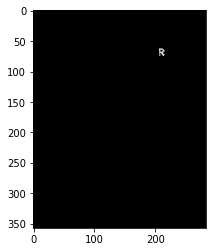

In [22]:
# Definición de umbral para la binarización de la imagen
# Prueba con diferentes umbrales y compara
umbral = 8
_, img_binary = cv2.threshold(np.float32(imgGray), umbral, 255, cv2.THRESH_BINARY);
plt.imshow(img_binary, cmap="gray");

**Escoje un umbral adecuado para que solo podamos ver en blanco la letra *R* de la imagen.**

## Visualización de volúmenes

En el grupo de investigación no solo trabajamos con imágenes, también hacemos análisis de video y trabajamos con secuencias de imágenes 3D (Tomografías o resonancias magnéticas).

Acontinuación veremos una forma para visualizar este tipo de datos en Python, en la que, por medio de un slider, podemos ir mostrando frame por frame. 


### Volumen espaciotemporal (video)

In [16]:
from ipywidgets import widgets, IntSlider, interactive

def funcion(x):
    img = Image.open("data/videoMarcha/PG_06_08_"+"0"*(3-len(str(x)))+str(x)+".jpg")
    plt.imshow(img)
    plt.show()

slow = interactive(funcion, x=widgets.IntSlider(min=30, max=147, step=5), continuous_update=False)
slow

interactive(children=(IntSlider(value=30, description='x', max=147, min=30, step=5), Output()), _dom_classes=(…

<br><br><br>

### Volumen espacial 3D

In [17]:
from ipywidgets import widgets, IntSlider, interactive

def funcion(x):
    img = Image.open("data/Tomografia/frame-0"+"0"*(2-len(str(x)))+str(x)+".png")
    plt.imshow(img)
    plt.show()

slow = interactive(funcion, x=widgets.IntSlider(min=1, max=15, step=1), continuous_update=False)
slow

interactive(children=(IntSlider(value=1, description='x', max=15, min=1), Output()), _dom_classes=('widget-int…

¿Logras ver la lesión del pulmón de la derecha?